<a href="https://colab.research.google.com/github/meeks627/Pytorch-Tutorial/blob/main/pytorch_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##INTRODUCTIION

In [120]:
import torch
import numpy as np

In [121]:
tensor_2d = torch.randn(3,4)
tensor_2d
# tensor_2d.dtype

tensor([[-0.1287,  0.9819, -1.0504, -2.1112],
        [-1.6784, -1.0515,  0.1677, -1.3358],
        [ 0.3738, -0.7649, -0.0159,  1.3998]])

In [122]:
tensor_3d= torch.randn(2,3,4)
tensor_3d

tensor([[[-0.5860, -1.5674, -1.0450,  0.1614],
         [-0.4359,  0.3245, -1.3839,  0.1604],
         [-0.9693,  1.1386, -1.9208,  1.0873]],

        [[ 0.3353, -0.4042,  0.3806, -0.0220],
         [ 1.5326,  0.5400, -0.0658, -2.0533],
         [ 0.2417, -0.3447,  0.7803, -1.1549]]])

###Tensor from Numpy

In [123]:
data = [[3,4],[8,11]]
xdata = np.array(data)
data_t = torch.tensor(data)
print(xdata)
print(data_t)
print(torch.from_numpy(xdata))
print(torch.ones_like(data_t))
print(torch.zeros_like(data_t))


[[ 3  4]
 [ 8 11]]
tensor([[ 3,  4],
        [ 8, 11]])
tensor([[ 3,  4],
        [ 8, 11]])
tensor([[1, 1],
        [1, 1]])
tensor([[0, 0],
        [0, 0]])


##Tensor Operation

In [117]:
my_tensor = torch.arange(20)
my_tensor.reshape(4,5)

tensor([[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9],
        [10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]])

In [118]:
my_tensor2 = torch.arange(20).reshape(2,2,5)
print(my_tensor2)
print(my_tensor2[:,1,1:-1])
print(my_tensor2[0,0:2,0:2])


tensor([[[ 0,  1,  2,  3,  4],
         [ 5,  6,  7,  8,  9]],

        [[10, 11, 12, 13, 14],
         [15, 16, 17, 18, 19]]])
tensor([[ 6,  7,  8],
        [16, 17, 18]])
tensor([[0, 1],
        [5, 6]])


In [119]:
Var1 = torch.randint(1,10,(2,2))
Var2 = torch.randint(1,10,(2,2))
print(torch.add(Var1,Var2))
print(torch.sub(Var1,Var2))
print(torch.mul(Var1,Var2))
print(torch.div(Var1,Var2))

tensor([[11,  7],
        [ 6, 10]])
tensor([[-5,  3],
        [ 0, -6]])
tensor([[24, 10],
        [ 9, 16]])
tensor([[0.3750, 2.5000],
        [1.0000, 0.2500]])


##Building a Simple model

In [124]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

In [125]:
class Model(nn.Module):
  def __init__(self,in_size=4,h1=8,h2=9,out_size=3):
    super().__init__() #instantiate ou nn.module
    self.fc1 = nn.Linear(in_size,h1)
    self.fc2= nn.Linear(h1,h2)
    self.out = nn.Linear(h2,out_size)
  def forward(self,x):
    X = F.relu(self.fc1(x))
    X = F.relu(self.fc2(X))
    X = self.out(X)
    return X

# M = Model()
# points = torch.randn(40,2)
# M.forward(points)
# print(M.w1.weight[1,1])
# print(M.w1.bias[1
#                 ])
# torch.save(M.state_dict(),'model.pt')

In [189]:
torch.manual_seed(41)
#create an instance of our model
model = Model()
url ='https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)
#change last column from strings to numbers
my_df['species']= my_df['species'].replace('setosa',0.0)
my_df['species']= my_df['species'].replace('versicolor',1.0)
my_df['species']= my_df['species'].replace('virginica',2.0)
# creating my datapoints
X = my_df.drop('species',axis=1)
y = my_df['species']
# Turnin into numpy array
X = X.values
y = y.values
print(my_df)
print()
print(X)
print()
print(y)

     sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2      0.0
1             4.9          3.0           1.4          0.2      0.0
2             4.7          3.2           1.3          0.2      0.0
3             4.6          3.1           1.5          0.2      0.0
4             5.0          3.6           1.4          0.2      0.0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3      2.0
146           6.3          2.5           5.0          1.9      2.0
147           6.5          3.0           5.2          2.0      2.0
148           6.2          3.4           5.4          2.3      2.0
149           5.9          3.0           5.1          1.8      2.0

[150 rows x 5 columns]

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]


<ipython-input-189-dedc367f6414>:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species']= my_df['species'].replace('virginica',2.0)


In [127]:
from sklearn.model_selection import train_test_split
#train test split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state=41)
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [128]:
#set the criterion of or model to measure the error
criterion = nn.CrossEntropyLoss()
# choose an optimzer, eta,epochs
optimizers = torch.optim.Adam(model.parameters(),lr = 0.01)

In [187]:
epochs =100
losses =[]
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {loss}')
  optimizers.zero_grad(

  )
  loss.backward()
  optimizers.step()

"\n"

lossess = []
for i in range(epochs):
  y_pred = model.forward(X_test)
  los = criterion(y_pred,y_test)
  lossess.append(loss.detach().numpy())
  if i % 10 == 0:
    print(f'Epoch:{i} and loss: {los}')
  optimizers.zero_grad(

  )
  los.backward()
  optimizers.step()

Epoch:0 and loss: 0.011087491177022457
Epoch:10 and loss: 0.010740920901298523
Epoch:20 and loss: 0.010417594574391842
Epoch:30 and loss: 0.01011499110609293
Epoch:40 and loss: 0.009831131435930729
Epoch:50 and loss: 0.009564240463078022
Epoch:60 and loss: 0.009312436915934086
Epoch:70 and loss: 0.009074258618056774
Epoch:80 and loss: 0.008848452940583229
Epoch:90 and loss: 0.008633916266262531
Epoch:0 and loss: 0.20502105355262756
Epoch:10 and loss: 0.18667598068714142
Epoch:20 and loss: 0.15765883028507233
Epoch:30 and loss: 0.13332639634609222
Epoch:40 and loss: 0.11681465804576874
Epoch:50 and loss: 0.10710497200489044
Epoch:60 and loss: 0.10205387324094772
Epoch:70 and loss: 0.09987164288759232
Epoch:80 and loss: 0.09904316812753677
Epoch:90 and loss: 0.09865208715200424


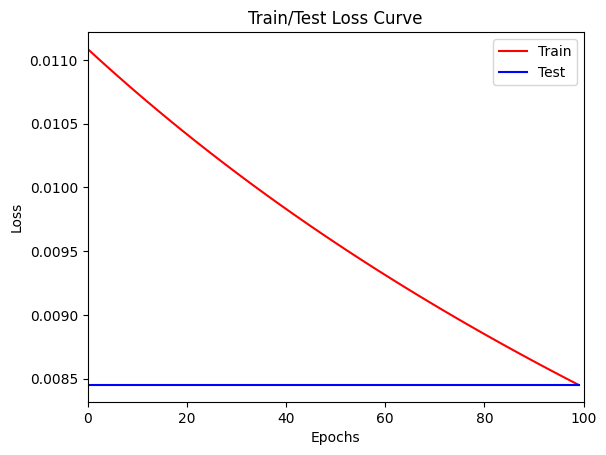

In [188]:

plt.plot(range(epochs),losses, color = "red",label="Train")
plt.plot(range(epochs),lossess, color = "blue",label="Test")
plt.title("Train/Test Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Test"])
plt.xlim(0,epochs)

plt.show()